In [1]:
# import community
import numpy as np
import networkx as nx
import matplotlib as mpl
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import graphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
import pydoc
import sys
sys.path.append("..")
from ds_navin import McmcTree as Tree

from utils import ColorPrint as _


font = {'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

There is 47 cells and 40 mutations at 40 genes in this dataset.


SCITE Navis's Tree Error: 1.6387115887902555
PIK3CA [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]"]
DNM3 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]"]
TRIM58 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]"]
DCAF8L1 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]"]
FBN2 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.\n 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.]"]
FCHSD2 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.\n 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0

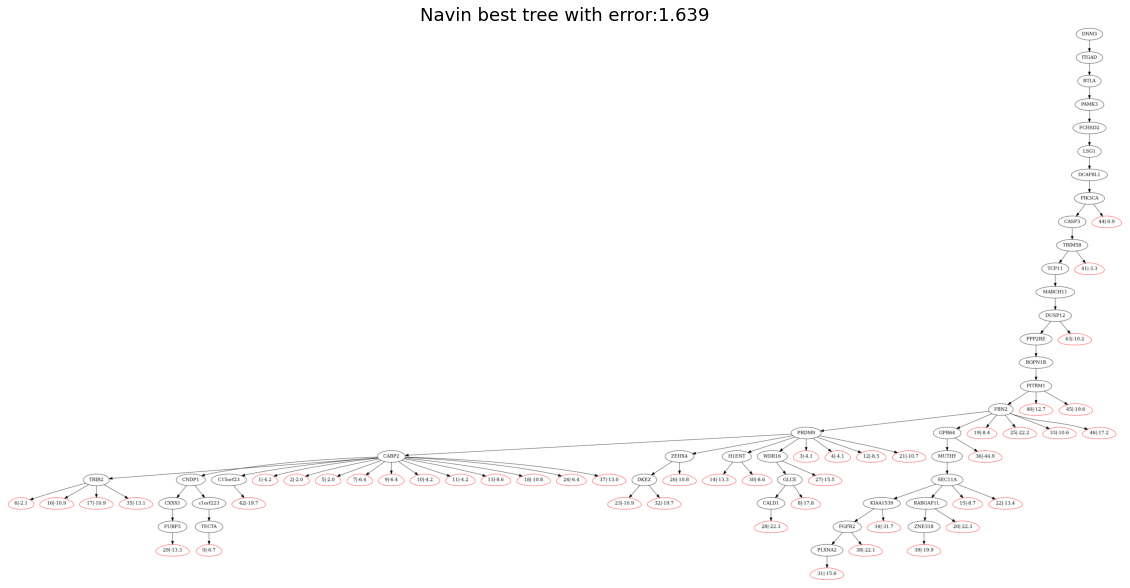

In [2]:
### load Navin's data
D = np.loadtxt('../datasets/real/dataNavin.csv', delimiter=' ')
gensNames = np.loadtxt('../datasets/real/dataNavin.geneNames', dtype=str)

D.shape
C_num = D.shape[1]
G_num = D.shape[0]
_.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )



### fill missed data
def tf(m,c):
    os = len(np.where(D[:,c]==1.))*1.
    zs = len(np.where(D[:,c]==0.))*1.
    return 1. if np.random.rand() < os/(os+zs) else 0.

for m in range(G_num):
    for c in range(C_num):
        if D[m,c] == 3.:
            D[m,c] = tf(m,c)



### SCITE Tree with Navin's data
SCITE_Navin_Tree = nx.DiGraph()
edges = [
    ('DNM3','ITGAD'), ('ITGAD','BTLA'), ('BTLA','PAMK3'), ('PAMK3', 'FCHSD2'), ('FCHSD2','LSG1'), 
    ('LSG1','DCAF8L1'), ('DCAF8L1','PIK3CA'), ('PIK3CA','CASP3'), ('CASP3','TRIM58'), ('TRIM58','TCP11'),
    ('TCP11','MARCH11'), ('MARCH11','DUSP12'), ('DUSP12','PPP2RE'), ('PPP2RE','ROPN1B'), ('ROPN1B','PITRM1'),
    ('PITRM1','FBN2'), ('FBN2','PRDM9'), ('FBN2','GPR64'), ('PRDM9','CABP2'), ('PRDM9','ZEHX4'), 
    ('PRDM9','H1ENT'), ('PRDM9', 'WDR16'), ('CABP2', 'TRIB2'), ('ZEHX4','DKEZ'), ('WDR16','GLCE'), 
    ('GLCE','CALD1'), ('CABP2','C15orf23'), ('CABP2','CNDP1'), ('CNDP1','CXXX1'), ('CNDP1','c1orf223'), 
    ('CXXX1','FUBP3'), ('c1orf223','TECTA'), ('GPR64','MUTHY'), ('MUTHY','SEC11A'), ('SEC11A','KIAA1539'), 
    ('SEC11A','RABGAP1L'), ('RABGAP1L','ZNE318'), ('KIAA1539','FGFR2'), ('FGFR2','PLXNA2')
]


dl = list(d for d in D)
SNT = Tree(gensNames, D=D, data_list=dl, name='Paper Tree')
SNT.set_edges(edges, remove_edges=True)

_.print_bold( 'SCITE Navis\'s Tree Error:', SNT.get_best_error() )
SNT.plot_best_T('paper_tree')

In [3]:
### Run
alpha = 0.001
beta = 0.01

### Run
dl = list(d for d in D)
T = Tree(gensNames, D, data_list=dl)
T.set_edges(edges, remove_edges=True)
# T.randomize()
# T.plot_best_T('sn_initial_tree')
T.set_rho(150)
# T.set_edges(edges, remove_edges=True)
for i in range(300):
    if T.next():
        break
# T.plot_best_T('sn_best_tree')
# T.plot_all_results()


# T.plot_best_T()

/home/afshin/Desktop/itmt/src/ds_navin.py:664: RuntimeWarning: divide by zero encountered in log
  np.log(self.alpha**(fp_cnt+1)/1 + ep)


step: 25,	mode:swap_nodes,	new_error:1.87,	last_error:1.64,	acc_prob:0.009
step: 50,	mode:swap_subtrees,	new_error:2.28,	last_error:2.21,	acc_prob:0.010
step: 75,	mode:swap_nodes,	new_error:2.06,	last_error:1.94,	acc_prob:0.009
step:100,	mode:swap_subtrees,	new_error:2.41,	last_error:1.94,	acc_prob:0.008
step:125,	mode:swap_nodes,	new_error:2.42,	last_error:1.94,	acc_prob:0.008
step:150,	mode:swap_subtrees,	new_error:1.91,	last_error:1.91,	acc_prob:1.000
step:175,	mode:swap_nodes,	new_error:3.07,	last_error:1.91,	acc_prob:0.006
step:200,	mode:swap_nodes,	new_error:1.95,	last_error:1.91,	acc_prob:0.010
step:225,	mode:swap_subtrees,	new_error:inf,	last_error:1.96,	acc_prob:0.000
step:250,	mode:swap_nodes,	new_error:2.00,	last_error:1.96,	acc_prob:0.010
step:275,	mode:swap_subtrees,	new_error:2.03,	last_error:1.90,	acc_prob:0.009
step:300,	mode:swap_nodes,	new_error:2.92,	last_error:1.90,	acc_prob:0.007


1.9020603825489544

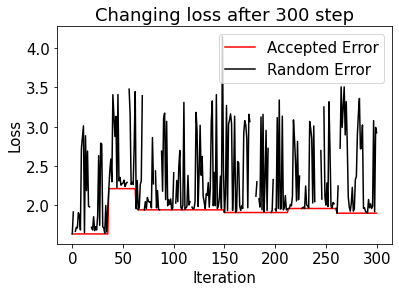

In [4]:
T.calc_curr_t_error()

1.6387115887902555

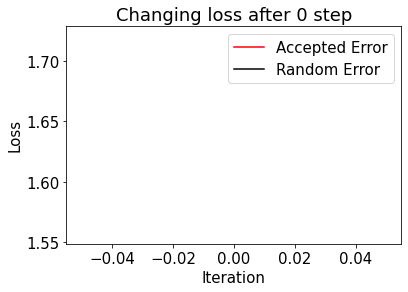

In [5]:
SNT.calc_curr_t_error()

In [6]:
# T.plot_best_T('sn_best_tree')
T.plot_all_results()

In [7]:
np.log(0.01)

-4.605170185988091

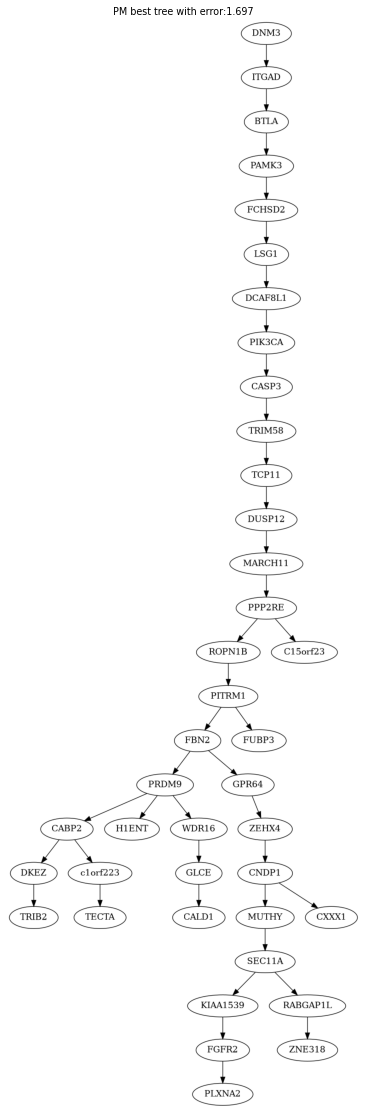

In [11]:
filename='pure_best_T.png'

pdot = nx.drawing.nx_pydot.to_pydot(T.get_tree())
pdot.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.title('PM best tree with error:{:0.3f}'.format(1.697))
plt.axis('off')
plt.savefig(filename)

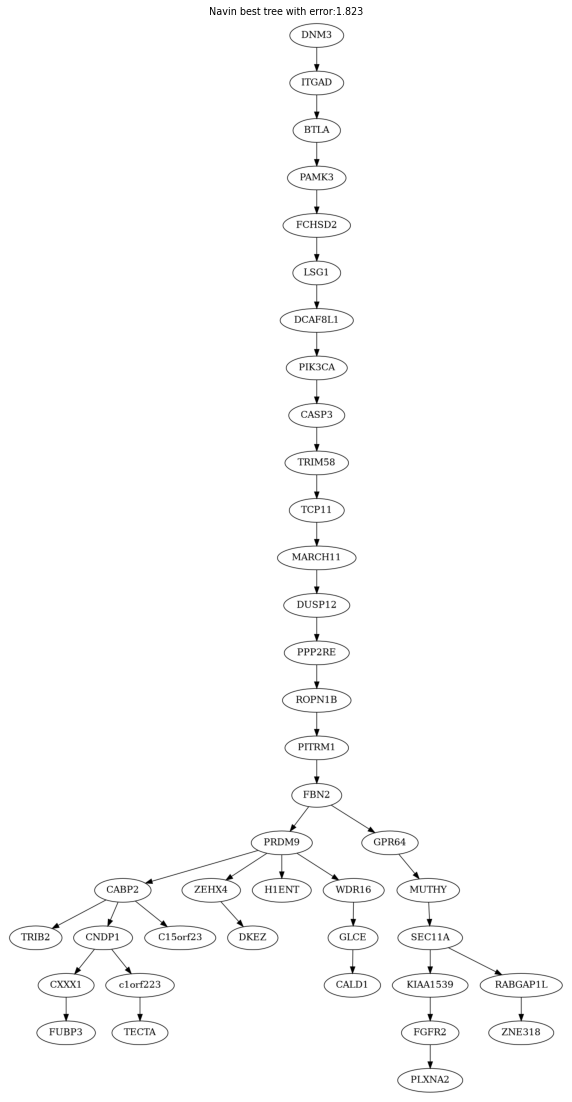

In [9]:
filename='navin_best_T.png'

pdot = nx.drawing.nx_pydot.to_pydot(SNT.get_best_tree())
pdot.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.title('Navin best tree with error:{:0.3f}'.format(1.823))
plt.axis('off')
plt.savefig(filename)

In [10]:
# ###  Benchmarking
# best_T = T.get_best_tree()
# best_g = best_T.to_undirected()
# gt_T = T.gt_T
# gt_T = gt_T.to_undirected()
# best_pair_dists = dict(nx.all_pairs_shortest_path_length(best_g))
# gt_pair_dists   = dict(nx.all_pairs_shortest_path_length(gt_T  ))
# diffs = []
# for i in range(M-1):
#     for j in range(i+1, M):
#         best_dis = best_pair_dists[str(i)][str(j)]
#         gt_dis   = gt_pair_dists  [i][j]
#         diff = abs(best_dis - gt_dis)
#         diffs.append(diff)
# means_pwd.append(np.mean(diffs))
# varia_pwd.append(np.var(diffs))
# best_engs.append(T.get_best_error())
# print(f'\trond={rond}, mean_pwd={means_pwd[-1]:0.4f}, varia_pwd={varia_pwd[-1]:0.4f}, best_eng={best_engs[-1]:0.4f}')